# Building Permits Classifier
*Part of an ongoing personal portfolio exploring applied data science workflows.*
- **Author:** Kimberly Hanson
- **Version:** v1.0: baseline data cleaning and feature selection
- **Date Started:** October 26, 2025
- **Last Updated:** October 26, 2025
- **Next:** base model build

This is an exercise to practice classification techniques on a real world dataset. Data comes from the City of Las Cruces (NM) open data portal: [City of Las Cruces Open Data Portal](https://communal-data-las-cruces.hub.arcgis.com/) > Transactional Data > Building Permit. The dataset was downloaded as CSV on October 26, 2025, and (per City staff) is updated daily.

The file includes 26 attributes — both numerical and categorical — with some missing data.
Not all attributes are used in this model; part of the goal is determining which features contribute most to accurate predictions.

**Note:** This notebook was developed in a dedicated virtual environment.
Use 'requirements_min.txt' for a lightweight install, or 'requirements.txt' for a full environment install.

In [1]:
# Consolidated libraries import

# Matplotlib
import matplotlib.pyplot as plt

#NumPy
import numpy as np

# Pandas
import pandas as pd

# Pathlib
from pathlib import Path

## Data import & cleaning
- [x] Import raw dataset
- [x] Check types
- [x] Missing values
    - [x] Remove missing targets
    - [x] Mean/Median/Mode/Remove missing attributes
- [x] Save cleaned dataset to folder & make copy DataFrame

In [2]:
# Get data & display to ensure good read in
# Using relative path from project root; adjust as needed for your environment

data = Path.cwd().parent / "data" / "raw" / "building_permits.csv"
df = pd.read_csv(data, low_memory = False)
df.head()

,OBJECTID,Permit_Type,Permit_Number,Permit_Location,Project,Project_Valuation,Contractor_Business_Name,Contractor_Name,IssueMonthNo,Issued_Month,...,recTypeOrd,Total_SQFT,PSFEE,PAFEE,UTFEE,CDFEE,TotalFeeInvoiced,X,Y,Zoning
0,1,RE-ROOF,16OC3500015,1823 SELDON AVE,RESIDENTIAL,5500.0,NORTH GATE CONSTRUCTION,SAMUEL CRUZ,10.0,OCT,...,4,0,0,0,0.0,63.11,63.11,-106.757683,32.323519,NaN
1,2,PLUMBING,16OC5600016,4317 PASEO DEL ORO CIR,RESIDENTIAL,0.0,NaN,NaN,10.0,OCT,...,4,0,0,0,13.5,57.75,71.25,-106.786677,32.365945,NaN
2,3,ALTERATION,16RB2500017,602 S ESPINA ST,RESIDENTIAL,3400.0,NaN,NaN,10.0,OCT,...,4,0,0,0,0.0,48.38,48.38,-106.768098,32.307009,NaN
3,4,RE-ROOF,16OC3500018,2335 DESERT DR,RESIDENTIAL,4800.0,ROOF KING,NaN,10.0,OCT,...,4,0,0,0,0.0,56.04,56.04,-106.773304,32.333487,NaN
4,5,PLUMBING,16OC5600019,4321 PASEO DEL ORO CIR,RESIDENTIAL,0.0,NISSI CONSTRUCTION LLC,NaN,10.0,OCT,...,4,0,0,0,13.5,57.75,71.25,-106.786755,32.366053,NaN


In [3]:
# Check data types
df.dtypes

OBJECTID                      int64
Permit_Type                  object
Permit_Number                object
Permit_Location              object
Project                      object
Project_Valuation           float64
Contractor_Business_Name     object
Contractor_Name              object
IssueMonthNo                float64
Issued_Month                 object
Issue_Year                  float64
Issued_Date                  object
Owner_Name                   object
Proposed_Use                 object
PropUseGrp                   object
RecTypeGrp                   object
recTypeOrd                    int64
Total_SQFT                    int64
PSFEE                         int64
PAFEE                         int64
UTFEE                       float64
CDFEE                       float64
TotalFeeInvoiced            float64
X                           float64
Y                           float64
Zoning                       object
dtype: object

In [4]:
# Check for missing data
df.isna().sum()

OBJECTID                        0
Permit_Type                  5775
Permit_Number                   0
Permit_Location               805
Project                         0
Project_Valuation              32
Contractor_Business_Name     4067
Contractor_Name             22524
IssueMonthNo                 3426
Issued_Month                 3426
Issue_Year                   3426
Issued_Date                  3426
Owner_Name                  14208
Proposed_Use                67290
PropUseGrp                  65799
RecTypeGrp                      0
recTypeOrd                      0
Total_SQFT                      0
PSFEE                           0
PAFEE                           0
UTFEE                           0
CDFEE                           0
TotalFeeInvoiced                0
X                               0
Y                               0
Zoning                      29765
dtype: int64

In [5]:
# Drop missing target rows
df.dropna(subset=['Permit_Type'],inplace=True)

In [6]:
# Calculate & use median for missing 'Project_Valuation'
# While not many are missing, median is a reasonable substitution
median_value = df['Project_Valuation'].median()
# Per documentation - avoiding future errors when df['Project_Valuation'].fillna(median_value,inplace=True) stops working
df['Project_Valuation'] = df['Project_Valuation'].fillna(median_value)

In [7]:
# Check for missing data
df.isna().sum()

OBJECTID                        0
Permit_Type                     0
Permit_Number                   0
Permit_Location                21
Project                         0
Project_Valuation               0
Contractor_Business_Name     3766
Contractor_Name             21214
IssueMonthNo                 2964
Issued_Month                 2964
Issue_Year                   2964
Issued_Date                  2964
Owner_Name                  12996
Proposed_Use                61515
PropUseGrp                  60051
RecTypeGrp                      0
recTypeOrd                      0
Total_SQFT                      0
PSFEE                           0
PAFEE                           0
UTFEE                           0
CDFEE                           0
TotalFeeInvoiced                0
X                               0
Y                               0
Zoning                      26218
dtype: int64

In [8]:
df_cleaned_full = df.copy()
outpath = Path.cwd().parent / "data" / "processed" / "building_permits_cleaned_full.csv"
df_cleaned_full.to_csv(outpath, index = False)

## Attribute Selection
- [x] Remove attributes unlikely to be helpful based on missing data, duplicate types, domain knowledge
- [x] Check numerical attributes for selection
- [x] Check categorical attributes for selection
- [x] Remove additional attributes unlikely to be helpful after review
- [x] Save limited cleaned dataset to folder & make copy DataFrame

### Remove attributes unlikely to be useful or missing to many data points:
- Unique Identifiers: OBJECTID, Permit_Number
- Low analytical relevance: Permit_Location (also in X/Y coordinates), Contractor_Business_Name, Contractor_Name, Owner_Name, recTypeOrd (related to RecTypeGrp)
- Extractable from Issued_Date: IssueMonthNumber, Issued_Month_Name, Issue_Year
- High missing data: Proposed_Use (89.6%), Zoning (39.15%)

In [9]:
# Remove attributes
df = df[['Permit_Type','Project','Project_Valuation','Issued_Date','RecTypeGrp','Total_SQFT','PSFEE','PAFEE','UTFEE','CDFEE','TotalFeeInvoiced','X','Y']]

In [10]:
# Describe numerical attributes for review
df[['Project_Valuation','Total_SQFT','PSFEE','PAFEE','UTFEE','CDFEE','TotalFeeInvoiced','X','Y']].describe()

,Project_Valuation,Total_SQFT,PSFEE,PAFEE,UTFEE,CDFEE,TotalFeeInvoiced,X,Y
count,6.696700e+04,66967.000000,66967.000000,66967.000000,66967.000000,66967.000000,66967.000000,66967.000000,66967.000000
mean,3.744267e+04,222.524856,102.588514,240.889572,227.094653,195.469254,707.937389,-106.754043,32.351253
std,3.216056e+05,733.590231,965.904230,3447.301318,1696.154533,1021.493327,5097.505281,0.288917,0.290403
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-106.936823,32.255798
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,55.000000,55.000000,-106.771418,32.317182
50%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,88.330000,90.000000,-106.748858,32.353997
75%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,160.000000,160.000000,-106.737228,32.389312
max,3.169234e+07,18785.000000,125568.000000,543400.000000,220348.000000,135027.900000,803995.900000,-32.322690,106.781353


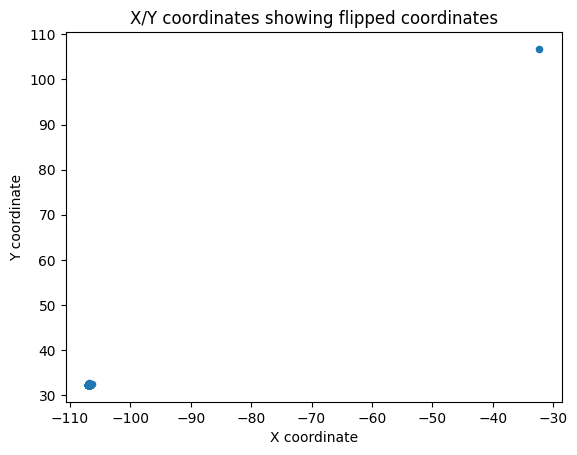

In [11]:
# Check coordinate issue
df.plot.scatter(x='X',y='Y')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('X/Y coordinates showing flipped coordinates')
plt.show()

In [12]:
# Coordinates look to be switched on X/Y
# X should all start with -106
# Y should all start with 32
# -32, 106 is off the western coast of Australia
mask = (df['X'].astype(str).str.startswith('-32')) & (df['Y'].astype(str).str.startswith('106'))
df.loc[mask,['X','Y']] = df.loc[mask,['Y','X']].values
df.loc[mask, 'X'] = -abs(df.loc[mask, 'X'])  # ensure X is negative
df.loc[mask, 'Y'] = abs(df.loc[mask, 'Y'])   # ensure Y is positive
df[['X','Y']].describe()

,X,Y
count,66967.000000,66967.000000
mean,-106.755155,32.350141
std,0.027252,0.040081
min,-106.936823,32.255798
25%,-106.771419,32.317182
50%,-106.748858,32.353997
75%,-106.737228,32.389310
max,-106.366960,32.624210


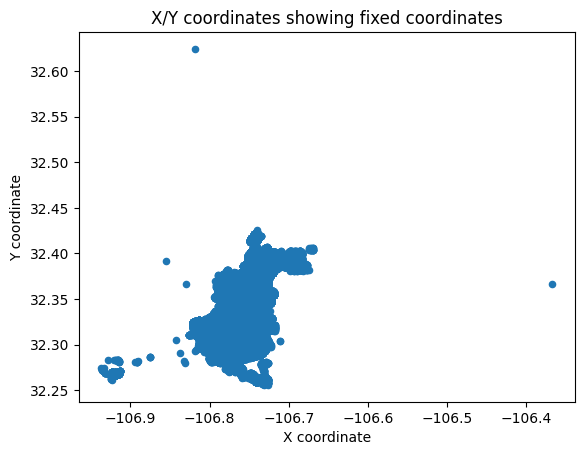

In [13]:
# Check coordinate issue to ensure the fix worked
df.plot.scatter(x='X',y='Y')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('X/Y coordinates showing fixed coordinates')
plt.show()

In [14]:
# List categorical attributes for review
print(df['Permit_Type'].value_counts(),'\n')
print(df['Project'].value_counts(),'\n')
print(df['RecTypeGrp'].value_counts())

Permit_Type
ELECTRICAL                 20810
PLUMBING                   18250
MECHANICAL                  9681
NEW                         6036
RE-ROOF                     5146
PERMIT                      1278
ALTERATION                  1172
PERMANENT                   1035
ADDITION                     761
ACCESSORY                    671
INSTALLATION                 432
POOL                         383
ZONING REVIEW                266
FIRE SPRINKLER               259
FIRE ALARM                   240
COMMUNICATION STRUCTURE      166
TEMPORARY                    135
SPECIAL SYSTEMS              107
FULL                          81
PARTIAL                       50
SERVICE LINE                   8
Name: count, dtype: int64 

Project
RESIDENTIAL         55061
COMMERCIAL           8629
FENCES AND WALLS     1278
SIGN                 1170
MOBILE HOME           432
WALL FENCE            266
DEMOLITION            131
Name: count, dtype: int64 

RecTypeGrp
OTHER          60049
RESIDENTIAL     5

In [15]:
# Remove additional attributes as identified, keeping Issued_Date even with missing data for later seasonal investigation
df = df[['Permit_Type','Project','Project_Valuation','Issued_Date','Total_SQFT','PSFEE','PAFEE','UTFEE','CDFEE','TotalFeeInvoiced','X','Y']]

In [16]:
df_cleaned_small_w_date = df.copy()
outpath = Path.cwd().parent / "data" / "processed" / "building_permits_cleaned_small_w_date.csv"
df_cleaned_small_w_date.to_csv(outpath, index = False)

df_cleaned_small = df[['Permit_Type','Project','Project_Valuation','Total_SQFT','PSFEE','PAFEE','UTFEE','CDFEE','TotalFeeInvoiced','X','Y']]
outpath = Path.cwd().parent / "data" / "processed" / "building_permits_cleaned_small.csv"
df_cleaned_small.to_csv(outpath, index = False)

df = df_cleaned_small.copy()

## Next Steps
This is a work in progress and will evolve over time. Planned next steps include:
- [ ] Create a baseline Decision Tree classifier with selected attributes (excluding date and coordinates). Target initial accuracy >=75%.
- [ ] Compare total vs. individual fee attributes.
- [ ] Explore adding coordinates (cluster vs. trigonometric) and check performance impact.
- [ ] Look into whether to include dates(for seasonality), even though 2,964 dates are missing.
- [ ] Test additional models (Random Forest, KNN, SVM, Logistic Regression, Gradient Boosting).
- [ ] Tune top model and document runtime.